# Exploring the World of Books

### Team members: Arun Mathew, Nikki Rastogi, Aquib Hussain

## Abstract
Exploring the relationship between an author's prolificacy, measured by the number of books written, and their average book ratings reveals nuanced dynamics within the realm of literature. The analysis, encompassing a diverse range of authors and their works, portrays an absence of a clear-cut correlation between prolificacy and quality, as indicated by average ratings. While some prolific authors maintain consistent high ratings across their numerous publications, others exhibit varied trends or stability regardless of their book count. This observation suggests that sheer volume of works might not singularly dictate the perceived quality, emphasizing the importance of maintaining consistent standards in literary creation. Further investigations into individual authors or genres could uncover deeper insights into the intricate relationship between prolificacy and book ratings, offering valuable perspectives on the multifaceted nature of authorship in literature.

## Introduction to World of Books and Reviews

In a world filled with endless literary choices, it can be challenging to find the next great read. This data project, "Exploring the World of Books and Reviews," is a journey into the vast realm of literature, designed to help book enthusiasts, researchers, and readers discover new insights and trends within the literary landscape.

Our dataset contains a wealth of information, encompassing a wide range of books, each a unique treasure waiting to be explored. It includes crucial details such as book IDs, authors, original publication years, titles from csv file and language, number of pages average ratings, and extensive user reviews from Web Scraping. With this data at our fingertips, we are poised to uncover intriguing patterns, preferences, and trends that shape the world of literature.

Throughout this project, we will delve into the role of authors, original publication years, ratings and language in influencing a book's reception. We will explore how average ratings and user reviews contribute to a book's reputation and popularity. Whether you're an avid reader seeking new recommendations, a data enthusiast fascinated by book analytics, or an author looking to understand what makes a bestseller, this project offers a unique and data-driven perspective on the world of books and reviews. Join us on this literary journey, and let's explore the stories hidden within the data. 




#### The code block below loads three datasets related to books and reviews into Pandas DataFrames using pd.read_csv() function with specific URL paths.This code snippet succinctly loads three datasets into DataFrames (df, ratings_df, and user_df) by directly reading CSV files from specific URLs hosted on GitHub.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/nikkirastogi/Exploring-the-World-of-Books/main/BX-Books.csv",
                delimiter=";",
            encoding="latin1",
            dtype={"Year-Of-Publication": object},
            on_bad_lines='skip',
        )

df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [2]:
ratings_df = pd.read_csv("https://raw.githubusercontent.com/nikkirastogi/Exploring-the-World-of-Books/main/BX-Book-Ratings.csv",
            delimiter=";",
            encoding="latin1",
            on_bad_lines = 'skip',
            dtype={"Book-Rating": object},
            )

ratings_df.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### DATA PREPROCESSING 


In [3]:
from books_cleaning import BooksCleaning
cleaner = BooksCleaning(df,ratings_df)

In [4]:
cleaner.select_attributes()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [5]:
df = cleaner.merge_dfs()
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Ratings
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,5
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,3
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,6
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),0
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,0
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,0
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,0


### DATA SUMMARY 

A data summary is a condensed overview of a dataset, presenting its main characteristics, structure, and key features through statistical measures, visualizations, and descriptions. It offers insights into the data's nature and helps understand its key attributes and distributions.

Proceeding further to perform the Summary of this Dataset.

From the src.book_review we are importing the data_summary which can be called as ds

In [6]:
from books_summary import BooksSummary
summerizer = BooksSummary(df)

Using the cleaning function from the data_summary module to clean or process the df, ratings_df, and user_df DataFrames. The cleaned or processed data is saved into a variable obj, and then exported to a CSV file named updated_dataset.csv without including the DataFrame index.

This Function is used to view all the columns in the dataset

In [7]:
summerizer.df_details()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Ratings
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,5
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,3
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,6


This Function extracts attributes from the provided obj variable for further analysis.

In [8]:
summerizer.df_attributes()

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Book-Ratings'],
      dtype='object')

This Function is used to find the info of the Dataset

In [9]:
summerizer.df_info()

<class 'pandas.core.frame.DataFrame'>
Index: 271357 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271357 non-null  object 
 1   Book-Title           271357 non-null  object 
 2   Book-Author          271355 non-null  object 
 3   Year-Of-Publication  271357 non-null  float64
 4   Publisher            271355 non-null  object 
 5   Book-Ratings         271357 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 14.5+ MB


This Function is used to find the Null Values in the Dataset

In [10]:
summerizer.df_null_values()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Book-Ratings           0
dtype: int64

This Function is used to find Shape of the dataset

In [11]:
summerizer.df_shape()

(271357, 6)

This Function is Used to describe the Dataset.

In [12]:
summerizer.df_describe()

,Year-Of-Publication,Book-Ratings
count,271357.000000,271357.000000
mean,1959.760817,2.972236
std,257.994226,3.881739
min,0.000000,0.000000
25%,1989.000000,0.000000
50%,1995.000000,0.000000
75%,2000.000000,7.000000
max,2050.000000,10.000000


This Function is used to define the Data types in the object 

### EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) serves as the cornerstone for understanding and interpreting our extensive dataset, which encapsulates diverse book details and user-generated reviews obtained through web scraping. EDA plays a pivotal role by providing a comprehensive view of the dataset's structure, integrity, and inherent patterns. It enables us to identify relationships between crucial attributes like authors, publication years, and user ratings, shedding light on the intricate dynamics shaping literary preferences. Through visualizations and summary statistics, EDA unveils hidden trends, correlations, and insights crucial for comprehending a book's reception and popularity. This analysis is invaluable for readers seeking literary recommendations, data enthusiasts exploring book analytics, and authors deciphering bestseller dynamics, offering a data-driven perspective on the multifaceted realm of books and reviews. EDA's significance lies in its ability to guide decision-making, support further analyses, and serve as a fundamental tool for deriving meaningful conclusions from the intricate narratives woven within our expansive dataset.

Proceeding further, we are importing the EDA from src.book 

In [13]:
from books_eda import BooksEDA
books_analyzer = BooksEDA(df)

The function highest_publisher(obj) uses the DataFrame df to determine and visualize the top 10 publishers with the most books. It computes the frequency of each publisher's appearance in the dataset, creating a bar chart representation where each bar signifies the count of books published by these top publishers. The chart, colored in sky blue, displays the distribution of books among these publishers, offering a quick glance at the prominence of publishing houses based on their book counts. This visualization aids in swiftly identifying the major contributors to the dataset in terms of book publications. 
Here we can see that the Harlequin has the Highest count of morethan 7000 and the Warner Books has scored a count of around 2500 among the top 10 Publishers.

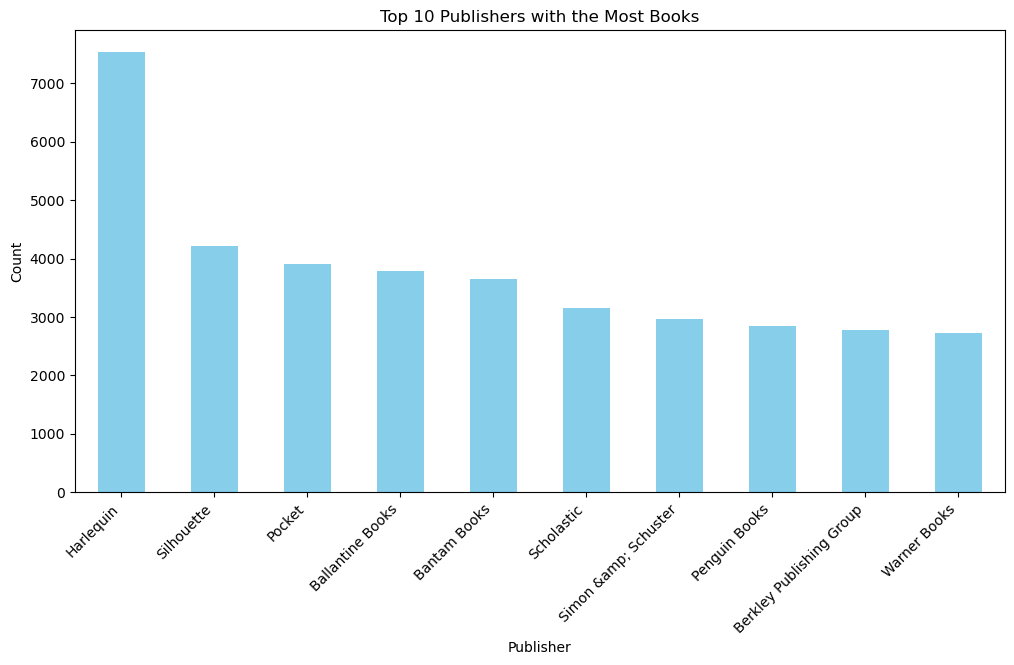

In [14]:

books_analyzer.highest_publisher()

The distribution(obj) function analyzes the publication year distribution in DataFrame df, focusing on years between 1800 and 2050. It creates a histogram displaying the count of books published in 10-year intervals within this timeframe. This plot offers a clear depiction of publication trends over time, aiding in recognizing patterns or spikes in book releases.

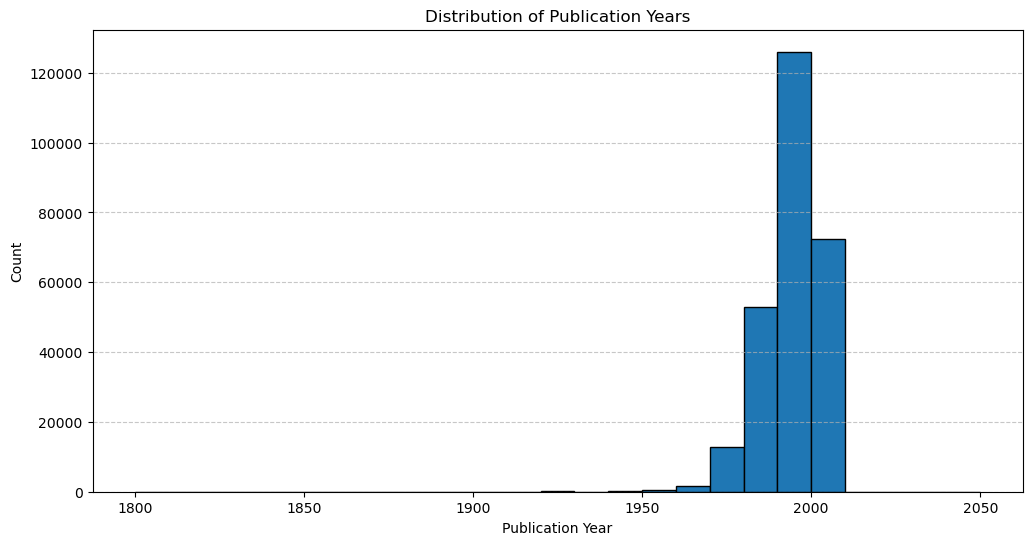

In [15]:
books_analyzer.distribution()

The df_word_cloud() function creates a visual representation known as a word cloud, depicting the distribution of book titles within the DataFrame obj. By aggregating all book titles and forming a cloud where word size corresponds to title frequency, it visually emphasizes the most common or frequently occurring titles. The function utilizes the WordCloud library to generate this representation, setting parameters for dimensions and background color. Once generated, the resulting word cloud offers a quick insight into prevalent themes or popular book titles present in the dataset, aiding in a rapid grasp of overarching trends or recurring topics among the books.

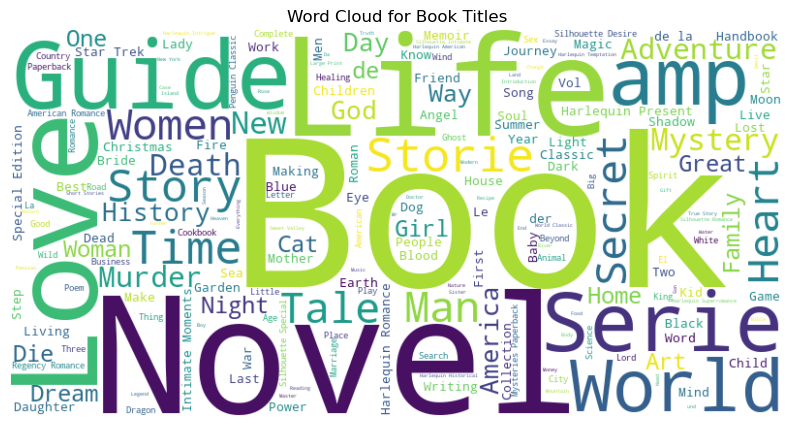

In [16]:
books_analyzer.df_word_cloud()

The highest_author(obj) function identifies and visualizes the top 10 authors with the most books in the DataFrame obj. It calculates the frequency of each author's appearance in the "Book-Author" column, generates a bar chart representing the author counts, and displays it. This visualization provides a quick overview of the most prolific authors within the dataset.The Count of Authors that is Agatha Christie is shown as the Highest and Charles Dickens the Lowest.

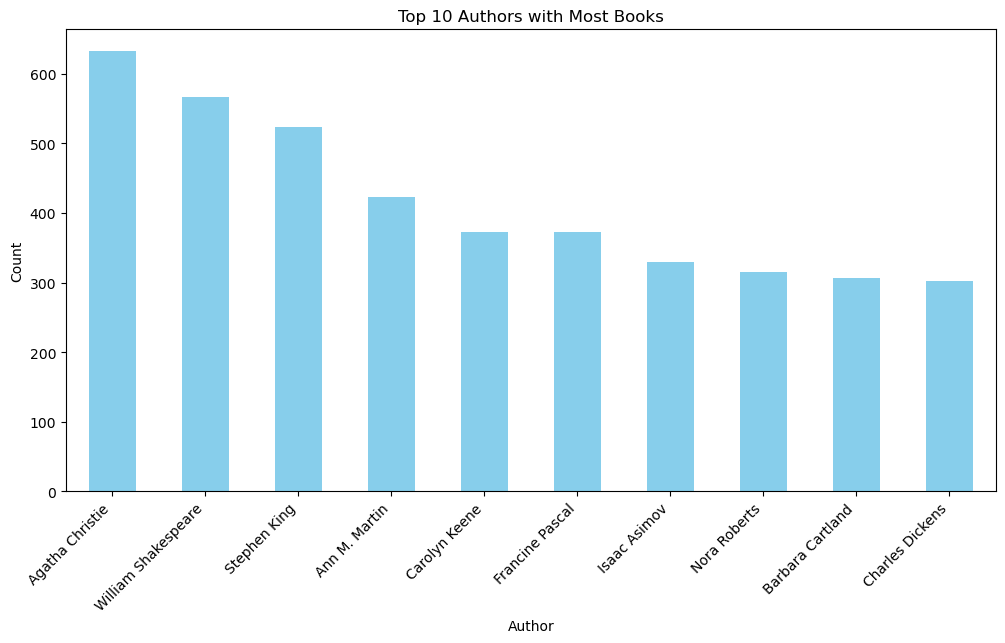

In [17]:
books_analyzer.highest_author()

The highest_ratings(obj) function focuses on the distribution of book ratings in the DataFrame obj. The Generated histogram using seaborn's histplot() function, illustrating the frequency distribution of book ratings. This visualization aids in understanding the spread and frequency of different rating values within the dataset. The Book ratings with 0 are higher for which there is a steep decline in the Frequency.

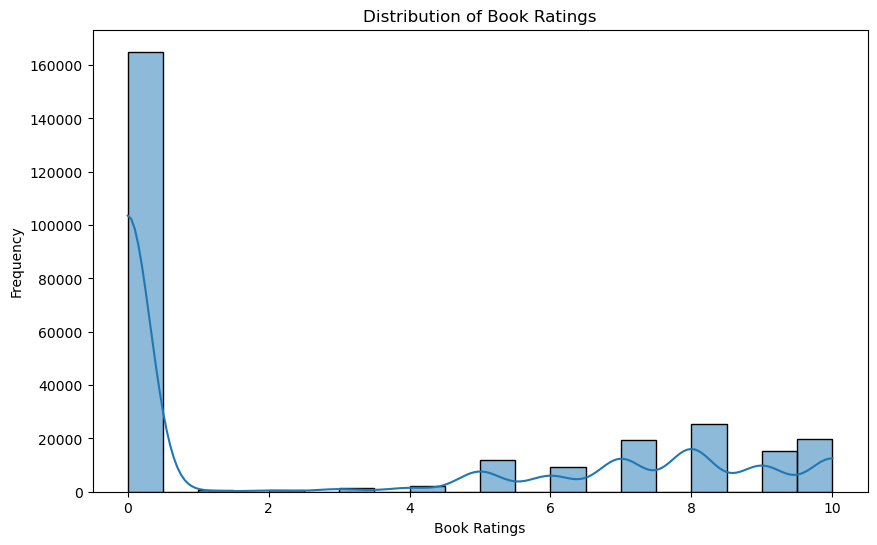

In [18]:
books_analyzer.highest_ratings()

The ratings_per_book(Obj) function analyzes the count of ratings per book in the DataFrame obj. It employs seaborn's countplot() function to showcase the frequency of different ratings assigned to books. This visualization presents a clear distribution of ratings received by books in the dataset.

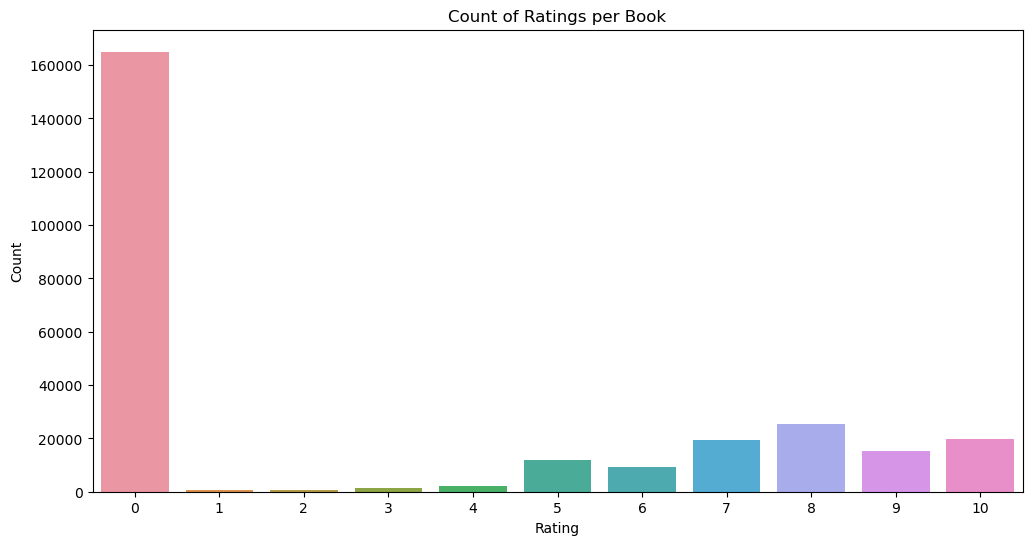

In [20]:
books_analyzer.ratings_per_book()

## WEB SCRAPING

Web scraping is the automated extraction of data from websites. It involves parsing HTML pages, extracting specific information, and storing it for further analysis. It's important as it enables access to vast amounts of data online, allowing businesses, researchers, or developers to gather valuable information from various websites efficiently.

The provided code demonstrates web scraping to extract book details from Amazon using a Python script. It utilizes a module called BookScraper from a file named book_scraper.py. The code initializes a list of book titles to scrape from Amazon. It then creates an instance of BookScraper using the Amazon URL. The scrape_books() method is used to extract details like title, rating, and number of user ratings for each book in the list.

Finally, a loop iterates through the extracted details for each book, printing information such as the title, rating, and the number of user ratings for each book. This process allows for the collection and normalization of book details from Amazon, making it feasible to analyze and utilize this data for various purposes like recommendations, analysis, or research.

In [21]:
from books_scraper import BooksScraper
import pandas as pd # Assuming your module is named book_scraper.py

# List of books to scrape
book_list = [
    "The Big Book of American Trivia",
    "Lay Down my Sword and Shield by James Lee Burke",
    "Hamlet (Wordsworth Classics)",
    "Calculating God: A Novel",
    "Plan of Attack",
    "Arcadia book by Tom Stoppard",
    "Le Colonel Chabert by Honoré de Balzac",
    "The Lake of Darkness (Vintage Crime/Black Lizard) by Ruth Rendell",
    "The Run by Stuart Woods",
    "Pandora by Anne Rice",
    "Self Analysis by L. Ron Hubbard"
]

url = "https://www.amazon.com"

# Create an instance of the AmazonBookScraper with the URL
scraper = BooksScraper(url)

# Scrape details for each book in the list
all_book_details = scraper.scrape_books(book_list)

# Print and normalize the extracted details for each book
for i, book_details in enumerate(all_book_details, start=1):
    print(f"\nDetails for Book {i} - {book_list[i-1]}:")
    print(f"Title: {book_details['title']}")
    print(f"Rating: {book_details['rating']}")
    print(f"num_user_rated: {book_details['num_user_rated']}")


Details for Book 1 - The Big Book of American Trivia:
Title: The Big Book of American Trivia
Rating: 4.2 out of 5 stars
num_user_rated: 230 ratings

Details for Book 2 - Lay Down my Sword and Shield by James Lee Burke:
Title: Lay Down My Sword and Shield
Rating: 4.1 out of 5 stars
num_user_rated: 1,119 ratings

Details for Book 3 - Hamlet (Wordsworth Classics):
Title: Hamlet (Wordsworth Classics)
Rating: 4.6 out of 5 stars
num_user_rated: 877 ratings

Details for Book 4 - Calculating God: A Novel:
Title: Calculating God
Rating: 4.3 out of 5 stars
num_user_rated: 627 ratings

Details for Book 5 - Plan of Attack:
Title: Plan of Attack
Rating: 4.4 out of 5 stars
num_user_rated: 329 ratings

Details for Book 6 - Arcadia book by Tom Stoppard:
Title: Arcadia
Rating: 4.5 out of 5 stars
num_user_rated: 582 ratings

Details for Book 7 - Le Colonel Chabert by Honoré de Balzac:
Title: Colonel Chabert
Rating: 4.4 out of 5 stars
num_user_rated: 95 ratings

Details for Book 8 - The Lake of Darkness

The pd.json_normalize(all_book_details) function converts a JSON-like object, all_book_details, into a Pandas DataFrame. This object likely contains details of multiple books retrieved, perhaps through web scraping. Each dictionary within all_book_details represents a book's information, like titles, ratings, and user counts. This conversion organizes the data into a structured table, where keys in the dictionaries become columns, and each row corresponds to a book's details. This tabular format streamlines the analysis and manipulation of the scraped book data using Pandas' powerful functionalities for data handling and analysis. 

In [22]:
pd.json_normalize(all_book_details)

,title,rating,num_user_rated
0,The Big Book of American Trivia,4.2 out of 5 stars,230 ratings
1,Lay Down My Sword and Shield,4.1 out of 5 stars,"1,119 ratings"
2,Hamlet (Wordsworth Classics),4.6 out of 5 stars,877 ratings
3,Calculating God,4.3 out of 5 stars,627 ratings
4,Plan of Attack,4.4 out of 5 stars,329 ratings
5,Arcadia,4.5 out of 5 stars,582 ratings
6,Colonel Chabert,4.4 out of 5 stars,95 ratings
7,The Lake of Darkness (Vintage Crime/Black Lizard),4.1 out of 5 stars,655 ratings
8,The Run (Will Lee Novels Book 5),4.5 out of 5 stars,"1,652 ratings"
9,Pandora,4.4 out of 5 stars,"1,187 ratings"


## INFERENCE
"Inference" refers to the process of drawing conclusions, making interpretations, or deriving insights from observed data or evidence. It involves reasoning from available information to reach a logical understanding or hypothesis about a situation, phenomenon, or dataset.Here we are addressing two Main questions which will help us understand the Relationships between the Books ,Authors , Ratings and Publications.

#### Is there a relationship between an author's average book rating and the number of books they have written?

The relationship between an author's average book rating and the number of books they have written can reveal intriguing insights. It may indicate whether prolific authors tend to maintain consistent quality across their works or if there's a correlation between the quantity of books and the average rating. Understanding this relationship can be valuable for publishers in making informed decisions about prolific authors.

Here we are Calculating the average ratings for authors, count the number of books per author, merge this data into a new DataFrame, and visualize the relationship between an author's book count and their average rating using a scatter plot. By leveraging Pandas to aggregate data, combining book counts and average ratings into a comprehensive dataset. The subsequent scatter plot provides an intuitive visualization, exploring any potential correlation between an author's prolificacy  and the average ratings received for their works

In below scatter plot, each point represents an author, and the x-axis represents the book count, while the y-axis represents the average rating.

In [25]:
from books_inference import BooksInference
book_inf = BooksInference(df)
book_inf.author_data().head()

,Average Rating,Book Count
Book-Author,,
D. Chiel,0.0,1
J. D. Landis,0.0,1
Mimma Balia,7.0,1
'N Sync,0.0,1
142 moms from all over the world,0.0,1


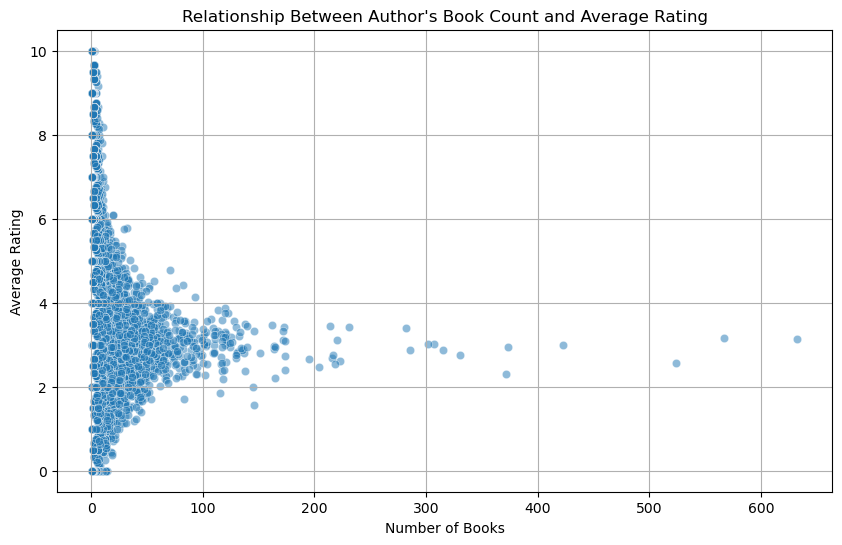

In [26]:
book_inf.plot_scatter1()

Analyzing the correlation between book ratings and the year of publication involves examining how the average ratings of books relate to the year in which they were originally published. This exploration can unveil trends, shifts, or patterns in readers' perceptions of books over time

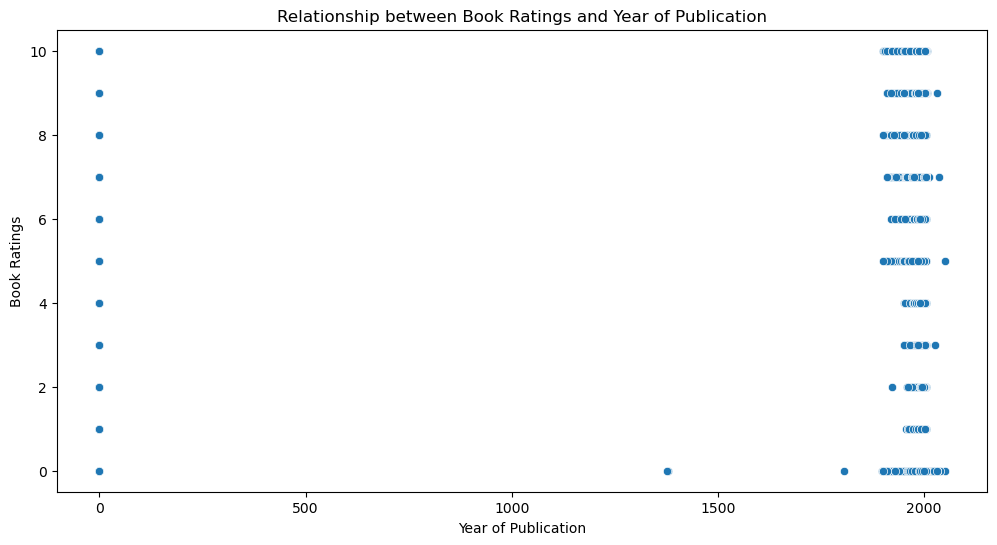

In [27]:
book_inf.ratings_and_year()

After scaling year field, we get below graph

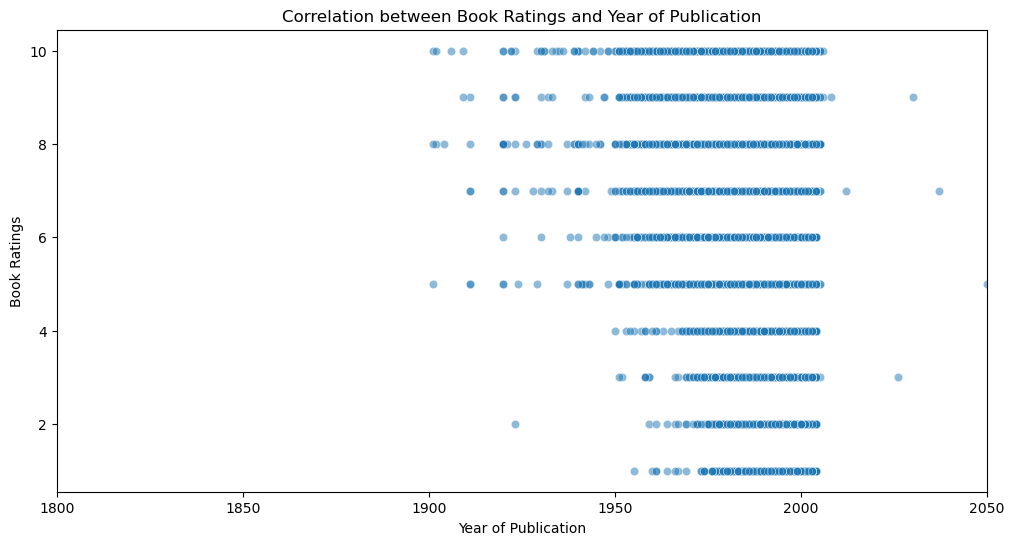

In [29]:
book_inf.corr_rating_year()

Exploring the relationship between an author's book count and average rating involves investigating whether prolific authors sustain consistent average ratings across their works or exhibit varying quality. This analysis seeks to discern if a higher volume of books correlates with higher or lower average ratings, shedding light on how an author's prolificacy influences their perceived quality and reputation among readers. By aggregating data on authors' book counts and average ratings, this exploration aims to reveal patterns, if any, in the intricate interplay between an author's productivity and the quality of their literary works

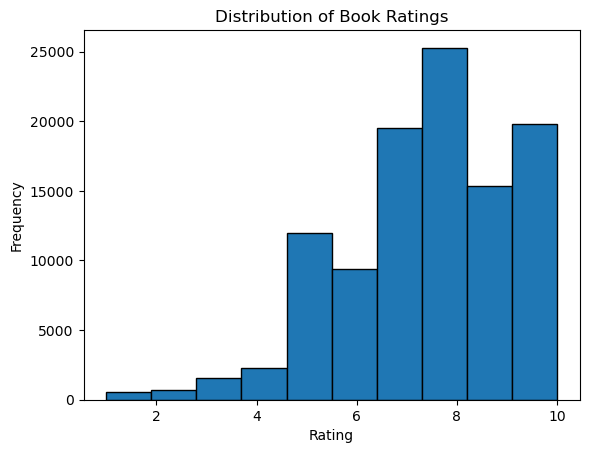

In [33]:
from book_surprise import BooksSurprise
book_surprise = BooksSurprise(df)
book_surprise.df_surprise()

## Conclusion

Upon analyzing the relationship between an author's book count and their average ratings, several observations emerge:

No Clear Correlation: The scatter plot does not distinctly exhibit a consistent pattern or correlation between an author's prolificacy (number of books written) and their average book ratings. This suggests that the quantity of an author's works might not inherently influence the quality, as reflected in the average ratings.

Varied Author Dynamics: Authors showcase diverse trends in their average ratings despite varying book counts. Some prolific authors maintain high ratings across numerous works, while others exhibit fluctuations or consistency irrespective of their book count.

Quality over Quantity: The analysis hints that for certain authors, maintaining consistent quality in their works might be more critical than sheer prolificacy, as indicated by steady or varying average ratings.

Further Exploration: While no definitive correlation is evident, deeper investigation into individual authors or genres may unveil nuanced trends or exceptions, providing more insights into the author's influence on their book ratings.

*We can see that the most of the Authors who have written the books under 200 are many, Moreover the ones who have written morethan 200 are countable. 
*
In essence, the analysis suggests that the relationship between an author's average book rating and their prolificacy is intricate and multifaceted, with factors beyond sheer book count influencing the perceived quality of their works.
